In [1]:
#Loading all our libraries to set up enviornment

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing our raw dataset for autocars
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(r'C:\Users\super\Documents\Excel\autocars.csv', names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
#We will now proceed with data cleaning starting with checking for duplicates
print(df.shape)
df.duplicated().sum()

(205, 26)


0

In [4]:
#we see that there are no duplicates present in this dataset.
#Now let us move on to indentify and handle missing data.
#The first step would be to convert all '?' to 'NaN'
df.replace('?',np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
#We will now check for missing values
missing_df = df.isnull()

for column in missing_df.columns.values.tolist():
    print(column)
    print(missing_df[column].value_counts())
    print("")

#Any results that show as 'True' would mean that there are missing values in the column

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

We notice that there are 7 columns with missing values, we will replace them with the following methods.

Replace missing values with mean:
normalized-losses: 41 missing values
bore: 4 missing values
stroke: 4 missing values
horsepower: 2 missing values
peak-rpm: 2 missing values
    
Replace missing values with mode:
num-of-doors: 2 missing values
    
Drop missing values:
price: 4 missing values
We need to drop this row because this is what we want to predict using the other variables.

In [7]:
#Replacing Missing values with Mean

#normalized-losses
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis = 0)
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)

#bore
avg_bore = df['bore'].astype('float').mean(axis = 0)
df['bore'].replace(np.nan, avg_bore, inplace = True)

#stroke
avg_stroke = df['stroke'].astype('float').mean(axis = 0)
df['stroke'].replace(np.nan, avg_stroke, inplace = True)

#horsepower
avg_horsepower = df['horsepower'].astype('float').mean(axis = 0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace = True)

#peak-rpm
avg_peak_rpm = df['peak-rpm'].astype('float').mean(axis = 0)
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace = True)

In [8]:
#Replacing Missing Values with Mode

mode_num_doors = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, mode_num_doors, inplace = True)

In [9]:
#Dropping missing values

df.dropna(subset=['price'],axis = 0, inplace = True)
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
#Now let us check if all the data types are correctly corresponding to the data present.

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
#Let us correct some of the data types and check our work.

#Let us change normalized-losses to "int"
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
#Let us change bore and stroke to "float"
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
#Let us change price to "float"
df[["price"]] = df[["price"]].astype("float")
#Let us change horsepower and peak-rpm to "float"
df[["horsepower","peak-rpm"]] = df[["horsepower","peak-rpm"]].astype("float")
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [13]:
#Let us now export our dataset since its cleaned
df.to_csv('clean_autocars.csv')

Let us now proceed with the Data Analysis.

First we are going to do some descriptive Statistical Analysis.

In [14]:
#numeric variables
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
#categorical variables
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


Now that we have found all the values and separated them by their categories to get a better understanding, we will now proceed with the next step which would be finding the correlation to see which relationships have the strongest relationship with the price.

In [16]:
df.corr().loc[:,'price'].to_frame().sort_values(by='price')

,price
highway-mpg,-0.704692
city-mpg,-0.686571
peak-rpm,-0.101616
symboling,-0.082391
compression-ratio,0.071107
stroke,0.082269
normalized-losses,0.133999
height,0.135486
bore,0.543155
wheel-base,0.584642


All those in the positive have a higher correlation with price. The list above is set from the least correlated to the most.

Since the top 5 would be:
engine-size
curb-weight
horsepower
width
length

We will now check the p-values to test if these 5 are statistically significant or not.

In [17]:
from scipy import stats

In [27]:
#find all of the pearson's correlation coefficients, and their corresponding p-values. 
engine_corr, engine_pvalue = stats.pearsonr(df['engine-size'], df['price'])
curb_corr, curb_pvalue = stats.pearsonr(df['curb-weight'], df['price'])
horsepower_corr, horsepower_pvalue = stats.pearsonr(df['horsepower'], df['price'])
width_corr, width_pvalue = stats.pearsonr(df['width'], df['price'])
highway_corr, highway_pvalue = stats.pearsonr(df['highway-mpg'], df['price'])


print('engine-size: ','\nCorrelation: ',engine_corr,'\nP-value:',engine_pvalue,'\n')
print('curb-weight: ','\nCorrelation: ',curb_corr,'\nP-value:',curb_pvalue,'\n')
print('horsepower: ','\nCorrelation: ',horsepower_corr,'\nP-value:',horsepower_pvalue,'\n')
print('width: ','\nCorrelation: ',width_corr,'\nP-value:',width_pvalue,'\n')
print('highway-mpg: ','\nCorrelation: ',highway_corr,'\nP-value:',highway_pvalue,'\n')

engine-size:  
Correlation:  0.8723351674455185 
P-value: 9.265491622198389e-64 

curb-weight:  
Correlation:  0.8344145257702846 
P-value: 2.1895772388936914e-53 

horsepower:  
Correlation:  0.809574567003656 
P-value: 6.369057428259557e-48 

width:  
Correlation:  0.7512653440522672 
P-value: 9.20033551048217e-38 

highway-mpg:  
Correlation:  -0.7046922650589529 
P-value: 1.7495471144477352e-31 



Now that we have shown that the p-values are statistically significant. Let us view the relationships with the other categorical fields to see if they would have a significant impact.

<AxesSubplot:xlabel='make', ylabel='price'>

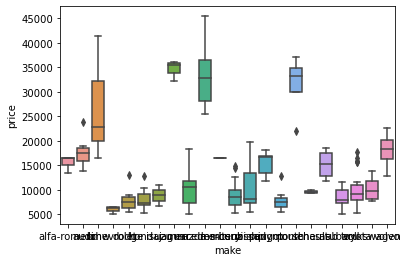

In [28]:
#Let us check the relationship between make and price using boxplot
sns.boxplot(x="make", y="price", data=df)

<AxesSubplot:xlabel='fuel-type', ylabel='price'>

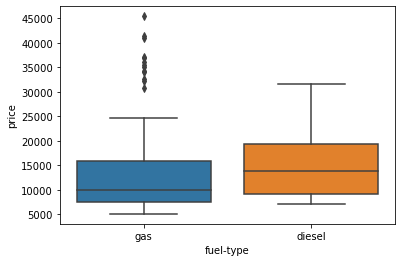

In [29]:
sns.boxplot(x="fuel-type", y="price", data=df)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

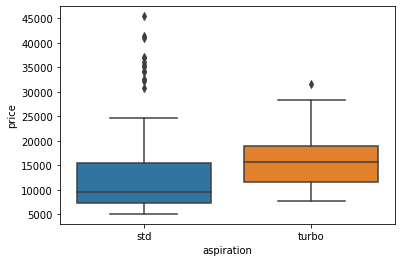

In [30]:
sns.boxplot(x="aspiration", y="price", data=df)

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

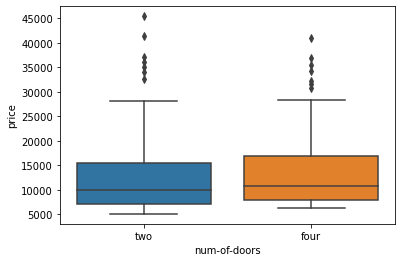

In [31]:
sns.boxplot(x="num-of-doors", y="price", data=df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

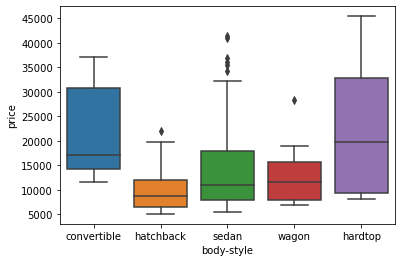

In [32]:
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

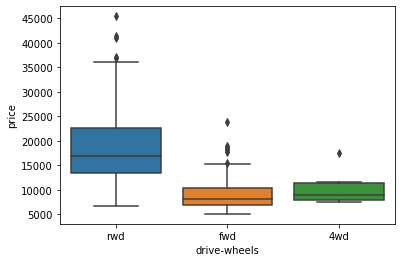

In [33]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

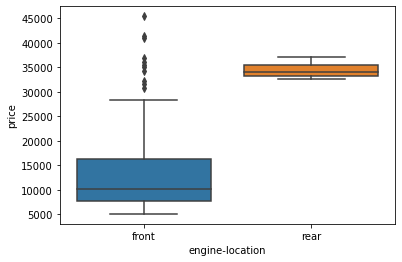

In [34]:
sns.boxplot(x="engine-location", y="price", data=df)

<AxesSubplot:xlabel='engine-type', ylabel='price'>

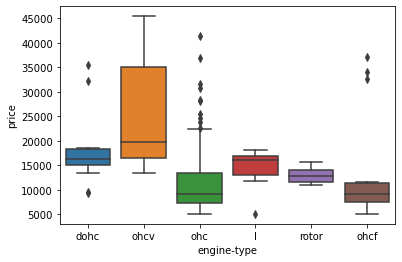

In [35]:
sns.boxplot(x="engine-type", y="price", data=df)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

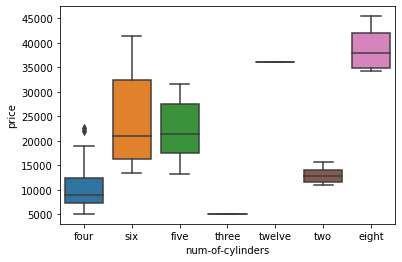

In [36]:
sns.boxplot(x="num-of-cylinders", y="price", data=df)

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

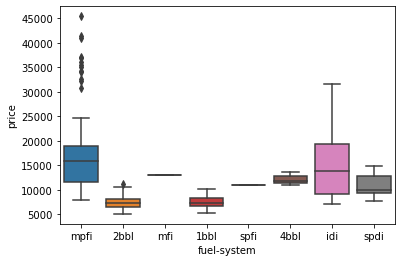

In [37]:
sns.boxplot(x="fuel-system", y="price", data=df)

Since there seems to be an overlap between the categorical values. Let us use the analysis of variance to get a better view.

In [38]:
drive_test = df[['drive-wheels','price']].groupby(['drive-wheels'])
engine_test = df[['engine-location','price']].groupby(['engine-location'])

Now that we set up drive_test and engine_test. Let us check the unique values before checking the variance.

In [39]:
drive_test['drive-wheels'].unique()

drive-wheels
4wd    [4wd]
fwd    [fwd]
rwd    [rwd]
Name: drive-wheels, dtype: object

In [40]:
engine_test['engine-location'].unique()

engine-location
front    [front]
rear      [rear]
Name: engine-location, dtype: object

In [41]:
# Now let us check the fvalue and pvalue for all the unique values 
drive_fvalue, drive_pvalue = stats.f_oneway(drive_test.get_group('4wd')['price'], drive_test.get_group('fwd')['price'], drive_test.get_group('rwd')['price'])
engine_fvalue, engine_pvalue = stats.f_oneway(engine_test.get_group('front')['price'], engine_test.get_group('rear')['price'])

print('Drive-wheels ANOVA results: ','\nF-value: ',drive_fvalue,'\nP-value: ',drive_pvalue,'\n')
print('Engine-location ANOVA results: ','\nF-value: ',engine_fvalue,'\nP-value: ',engine_pvalue)

Drive-wheels ANOVA results:  
F-value:  67.95406500780399 
P-value:  3.3945443577151245e-23 

Engine-location ANOVA results:  
F-value:  24.495550318865693 
P-value:  1.583490019777699e-06


In [42]:
#Let us now take a deeper look by diving into the drive-wheels categories.

#4wd and fwd
fvalue_1, pvalue_1 = stats.f_oneway(drive_test.get_group('4wd')['price'], drive_test.get_group('fwd')['price'])

#4wd and rwd
fvalue_2, pvalue_2 = stats.f_oneway(drive_test.get_group('4wd')['price'], drive_test.get_group('rwd')['price'])

#fwd and rwd
fvalue_3, pvalue_3 = stats.f_oneway(drive_test.get_group('fwd')['price'], drive_test.get_group('rwd')['price'])

print('4wd and fwd: ', '\nF-value: ', fvalue_1, '\nP-value: ', pvalue_1,'\n')
print('4wd and rwd: ', '\nF-value: ', fvalue_2, '\nP-value: ', pvalue_2,'\n')
print('fwd and rwd: ', '\nF-value: ', fvalue_3, '\nP-value: ', pvalue_3,'\n')

4wd and fwd:  
F-value:  0.665465750252303 
P-value:  0.41620116697845666 

4wd and rwd:  
F-value:  8.580681368924756 
P-value:  0.004411492211225333 

fwd and rwd:  
F-value:  130.5533160959111 
P-value:  2.2355306355677845e-23 



We notice that fwd and rwd have significantly different values compared to the rest. So let us now create some dummy variables for the analysis using this set.

In [43]:
#drive-wheels
drive_dummy_var = pd.get_dummies(df['drive-wheels'])
drive_dummy_var.drop('4wd', axis = 1, inplace = True)
drive_dummy_var.rename(columns = {'fwd':'drive-wheels-fwd','rwd':'drive-wheels-rwd'}, inplace=True)


#engine-location
engine_dummy_var = pd.get_dummies(df['engine-location'])
engine_dummy_var.rename(columns = {'front':'engine-location-front','rear':'engine-location-rear'},inplace=True)

In [44]:
drive_dummy_var.head(), engine_dummy_var.head()

(   drive-wheels-fwd  drive-wheels-rwd
 0                 0                 1
 1                 0                 1
 2                 0                 1
 3                 1                 0
 4                 0                 0,
    engine-location-front  engine-location-rear
 0                      1                     0
 1                      1                     0
 2                      1                     0
 3                      1                     0
 4                      1                     0)

In [45]:
#Let's add these dummy variables to our original dataframe.

df = pd.concat([df, drive_dummy_var, engine_dummy_var], axis = 1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,drive-wheels-fwd,drive-wheels-rwd,engine-location-front,engine-location-rear
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,1,0,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,0,0,1,0


Now that we have found our variables let us start the model development and evaluation.

Numerical Variables:
1. engine-size
2. curb-weight
3. horsepower
4. width
5. highway-mpg

Categorical Variables:
1. drive-wheels (fwd and rwd categories)
2. engine-location (front and rear categories)

In [46]:
#Let us check the multi-collinearity between variables that we found.
df_model = df[['engine-size','curb-weight','horsepower','width','highway-mpg','drive-wheels-fwd', 
               'drive-wheels-rwd', 'engine-location-front','engine-location-rear','price']]
corr = df_model.corr()
corr.style.background_gradient(cmap='coolwarm')

,engine-size,curb-weight,horsepower,width,highway-mpg,drive-wheels-fwd,drive-wheels-rwd,engine-location-front,engine-location-rear,price
engine-size,1.000000,0.849072,0.822676,0.729436,-0.679571,-0.511364,0.559063,-0.199367,0.199367,0.872335
curb-weight,0.849072,1.000000,0.757976,0.866201,-0.794889,-0.658408,0.670611,-0.051287,0.051287,0.834415
horsepower,0.822676,0.757976,1.000000,0.615077,-0.804575,-0.539040,0.584433,-0.342117,0.342117,0.809575
width,0.729436,0.866201,0.615077,1.000000,-0.680635,-0.458939,0.507028,0.052205,-0.052205,0.751265
highway-mpg,-0.679571,-0.794889,-0.804575,-0.680635,1.000000,0.594527,-0.571216,0.102964,-0.102964,-0.704692
drive-wheels-fwd,-0.511364,-0.658408,-0.539040,-0.458939,0.594527,1.000000,-0.919914,0.146768,-0.146768,-0.595979
drive-wheels-rwd,0.559063,0.670611,0.584433,0.507028,-0.571216,-0.919914,1.000000,-0.159545,0.159545,0.637522
engine-location-front,-0.199367,-0.051287,-0.342117,0.052205,0.102964,0.146768,-0.159545,1.000000,-1.000000,-0.331062
engine-location-rear,0.199367,0.051287,0.342117,-0.052205,-0.102964,-0.146768,0.159545,-1.000000,1.000000,0.331062
price,0.872335,0.834415,0.809575,0.751265,-0.704692,-0.595979,0.637522,-0.331062,0.331062,1.000000


Since we are checking the compatiblity with price now, we can see that drive-wheels and engine location are not very compatible with price so let us remove them and check again.

In [47]:
df_model = df[['engine-size','curb-weight','horsepower','width','highway-mpg','price']]
corr = df_model.corr()
corr.style.background_gradient(cmap='coolwarm')

,engine-size,curb-weight,horsepower,width,highway-mpg,price
engine-size,1.000000,0.849072,0.822676,0.729436,-0.679571,0.872335
curb-weight,0.849072,1.000000,0.757976,0.866201,-0.794889,0.834415
horsepower,0.822676,0.757976,1.000000,0.615077,-0.804575,0.809575
width,0.729436,0.866201,0.615077,1.000000,-0.680635,0.751265
highway-mpg,-0.679571,-0.794889,-0.804575,-0.680635,1.000000,-0.704692
price,0.872335,0.834415,0.809575,0.751265,-0.704692,1.000000


In [48]:
#Let's also compute the Variance Inflation Factor(VIF) to get more information on the multi-collinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_model_noprice = df[['engine-size','curb-weight','horsepower','width','highway-mpg']]

vif = pd.DataFrame()
vif["features"] = df_model_noprice.columns
vif["vif_Factor"] = [variance_inflation_factor(df_model_noprice.values, i) for i in range(df_model_noprice.shape[1])]
vif

,features,vif_Factor
0,engine-size,55.814128
1,curb-weight,184.185154
2,horsepower,39.817689
3,width,370.454528
4,highway-mpg,78.318877


Let's try and remove some variables to reduce the collinearity.

We need to keep engine-size and curb-weight as they are most highly correlated with price. So we should observe how removing horsepower, width, and highway-mpg would impacts our VIF.

In [49]:
#Let us first remove horsepower and check.
df_model_noprice = df[['engine-size','curb-weight','highway-mpg','width']]
                       
vif = pd.DataFrame()
vif["features"] = df_model_noprice.columns
vif["vif_Factor"] = [variance_inflation_factor(df_model_noprice.values, i) for i in range(df_model_noprice.shape[1])]
vif

,features,vif_Factor
0,engine-size,37.186381
1,curb-weight,175.783836
2,highway-mpg,55.212179
3,width,282.709074


In [50]:
#Let us remove highway-mpg now
df_model_noprice = df[['engine-size','curb-weight','horsepower','width']]
                       
vif = pd.DataFrame()
vif["features"] = df_model_noprice.columns
vif["vif_Factor"] = [variance_inflation_factor(df_model_noprice.values, i) for i in range(df_model_noprice.shape[1])]
vif

,features,vif_Factor
0,engine-size,50.727300
1,curb-weight,110.067638
2,horsepower,28.070134
3,width,40.579772


In [51]:
#Let us now remove width
df_model_noprice = df[['engine-size','curb-weight','horsepower','highway-mpg']]
                       
vif = pd.DataFrame()
vif["features"] = df_model_noprice.columns
vif["vif_Factor"] = [variance_inflation_factor(df_model_noprice.values, i) for i in range(df_model_noprice.shape[1])]
vif

,features,vif_Factor
0,engine-size,47.936409
1,curb-weight,62.580062
2,horsepower,30.386515
3,highway-mpg,8.579089


Removing width has the greatest impact on the VIF, but our model still has significant multi-collinearity. The most important variables for our model are:

1. engine-size
2. curb-weight
3. horsepower
4. highway-mpg

Since we are developing a model with multiple variables that deal with multi-collinearity, a ridge regression model will be best to help us predict price accurately.

In [52]:
#Let us use ridge regression to predict the price

df_model = df[['engine-size','curb-weight','horsepower','highway-mpg','price']]

#select our independent variables and our dependent variable
y = df_model['price']
x = df_model.drop('price',axis=1)

#split our data into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [55]:
#Now we can use Grid Search to find the best alpha for our Ridge Regression model.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#select potential parameters
parameters = [{'alpha':np.linspace(0.001,50000)}]

#create ridge regression object
RR = Ridge()

#create ridge grid search object
Grid = GridSearchCV(RR, parameters, cv=4)

#train the model
Grid.fit(x_train, y_train)

#find the Ridge Regression Model with the best value for alpha
Best_RR = Grid.best_estimator_
Best_RR

Ridge(alpha=14285.715000000002)

In [54]:
# Let's now test how good our model is using our test data by finding the R-squared value.
Best_RR.score(x_test,y_test)

0.7833787906541944

This Ridge regression model predicts 78.3% of the variation in the price.

Let's plot the distribution of the predicted values vs. the actual values to see how well our Ridge Regression model predicts price.

In [56]:
#First, we will predict new values using our Ridge Regression Model.
y_hat = Best_RR.predict(x_test)

In [57]:
#Now, we can plot the predicted values vs. the actual values.
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 6
    height = 4
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()

    plt.show()
    plt.close()

C:\Users\super\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\super\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


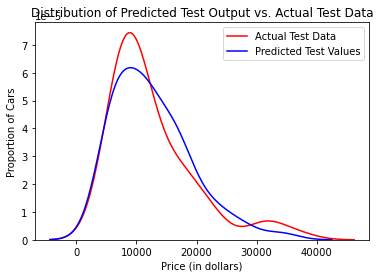

In [58]:
Title = 'Distribution of Predicted Test Output vs. Actual Test Data'
DistributionPlot(y_test, y_hat, "Actual Test Data",'Predicted Test Values', Title)

Now that we have this let's try and compare this to a ridge regression model with polynomial features of 2 degrees so we have a better view

In [59]:
from sklearn.pipeline import Pipeline
#set parameters for the Grid Search
parameters2 = [{'alpha':np.linspace(23,24)}]

#set the steps in the pipeline 
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),
         ('mode',Ridge(23.5))]

#Create the Pipeline object with the steps specified above. 
pipe = Pipeline(Input)

#Train the model
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', Ridge(alpha=23.5))])

In [60]:
#get the R-squared score
pipe.score(x_test,y_test)

0.8096400651583092

This Polynomial Ridge regression model predicts about 80.9% of the variation in the price. This model is a better predictor of price than our other model.

So now let us plot the predicted values vs actual values.

C:\Users\super\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\super\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


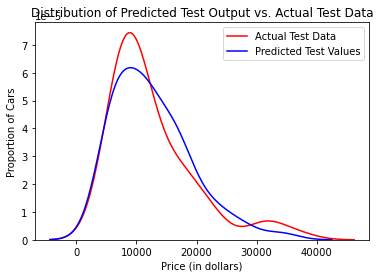

In [61]:
#predicted values
yhat = pipe.predict(x_test)

#plot the graph
Title = 'Distribution of Predicted Test Output vs. Actual Test Data'
DistributionPlot(y_test, y_hat, "Actual Test Data",'Predicted Test Values', Title)

In conclusion based on the different analysis method the one that gave us the best prediction is Ridge Regression model with Polynomial Features of Degree 2.